In [5]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Yogaaprila/house-price-prediction-using-machine-learning/main/house_price_regression_dataset.csv')

# print top 5 rows data
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [19]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


# 1. Exploratory Data Analysis (EDA)

## 1.1 Summary Statistics

In [18]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


## 1.2 Univariate Analysis

### 1.2.1 Boxplot

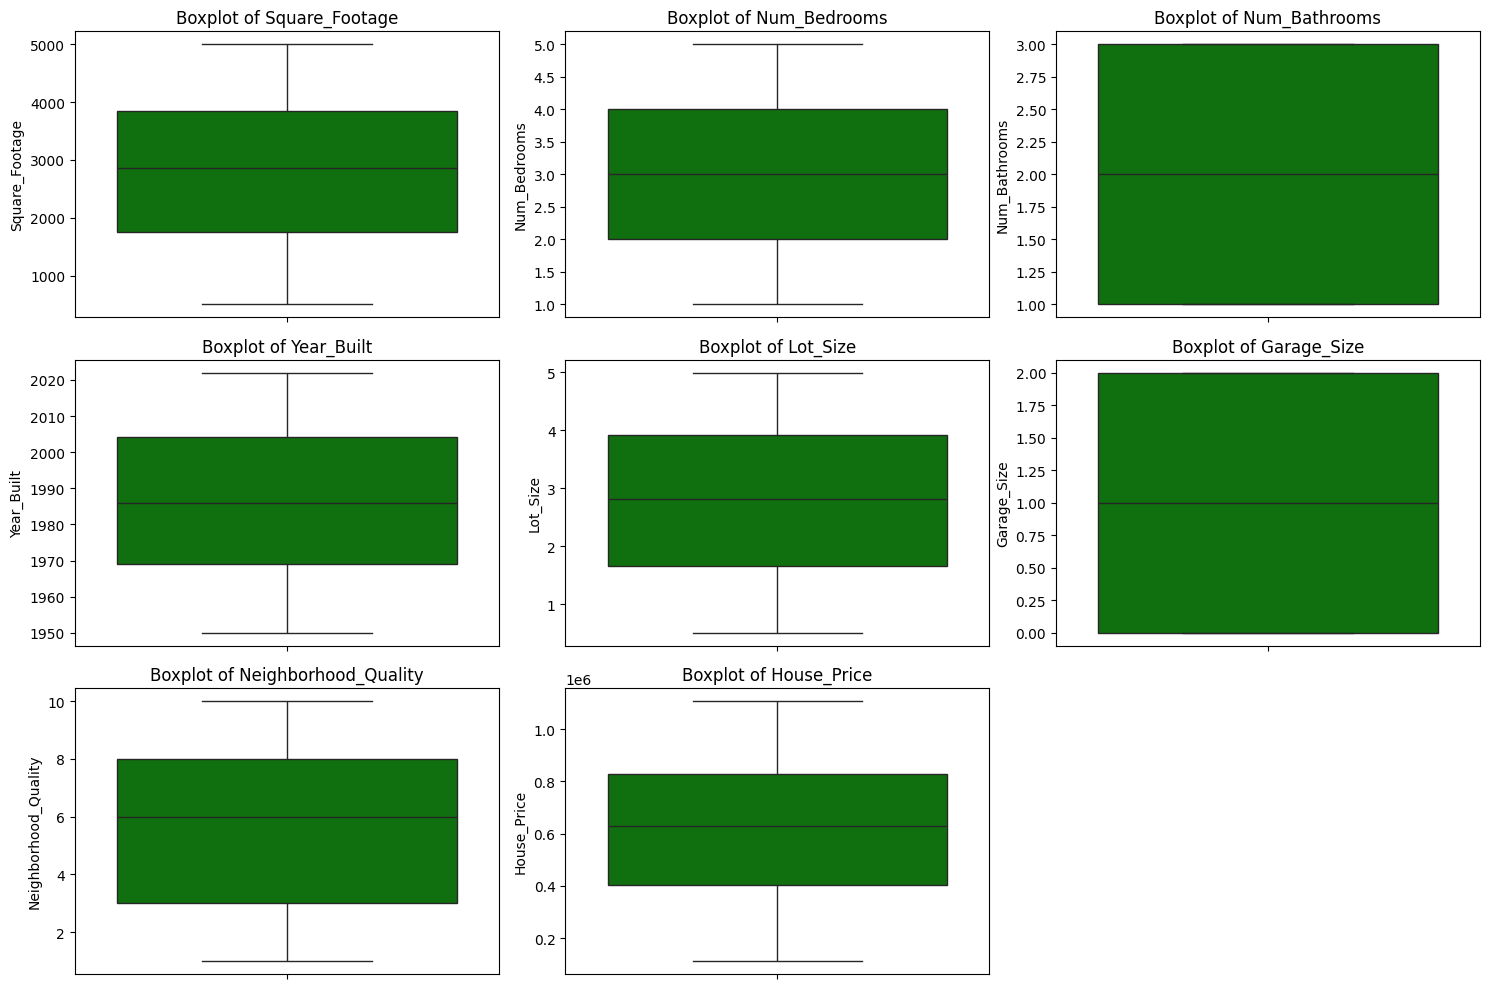

In [21]:
numerical = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)  # Create a (mxn) grid for the boxplot
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### 1.2.2 Histogram and Distribution Line

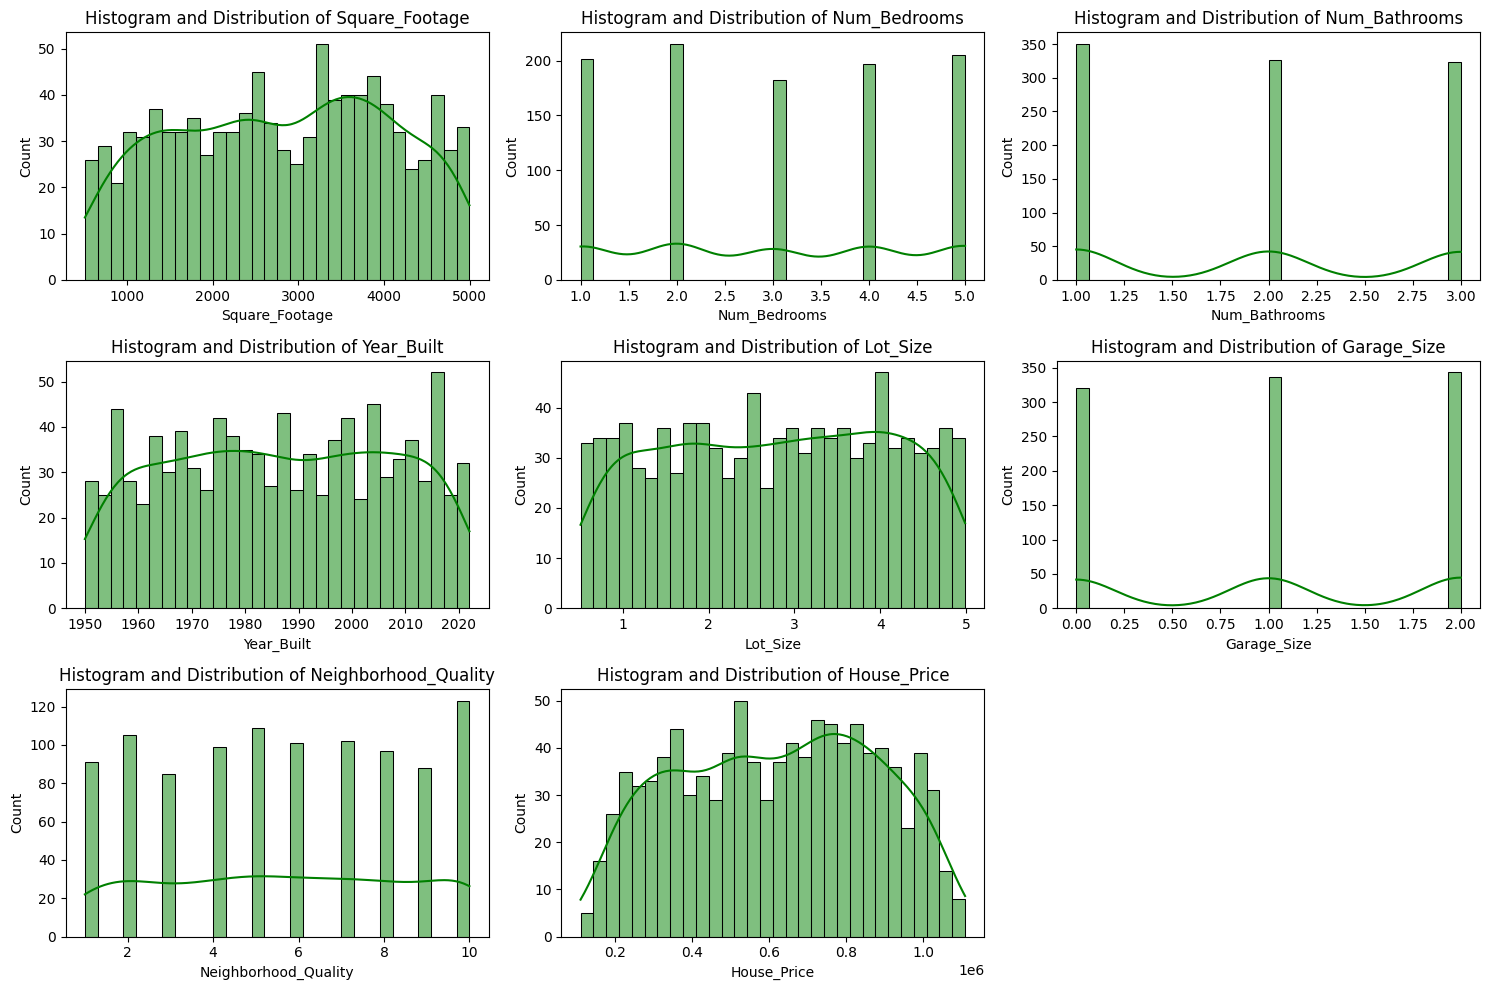

In [100]:
numerical = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)  # Create a (mxn) grid for the boxplot
    sns.histplot(df[col], kde=True, bins=30, color='green')  # create histogram with distribution line
    plt.title(f'Histogram and Distribution of {col}')
    
plt.tight_layout()
plt.show()

### 1.2.3 Distibution of Number of Bedroom, Number of Bathroom, Garage Size, and Neighborhood Quality

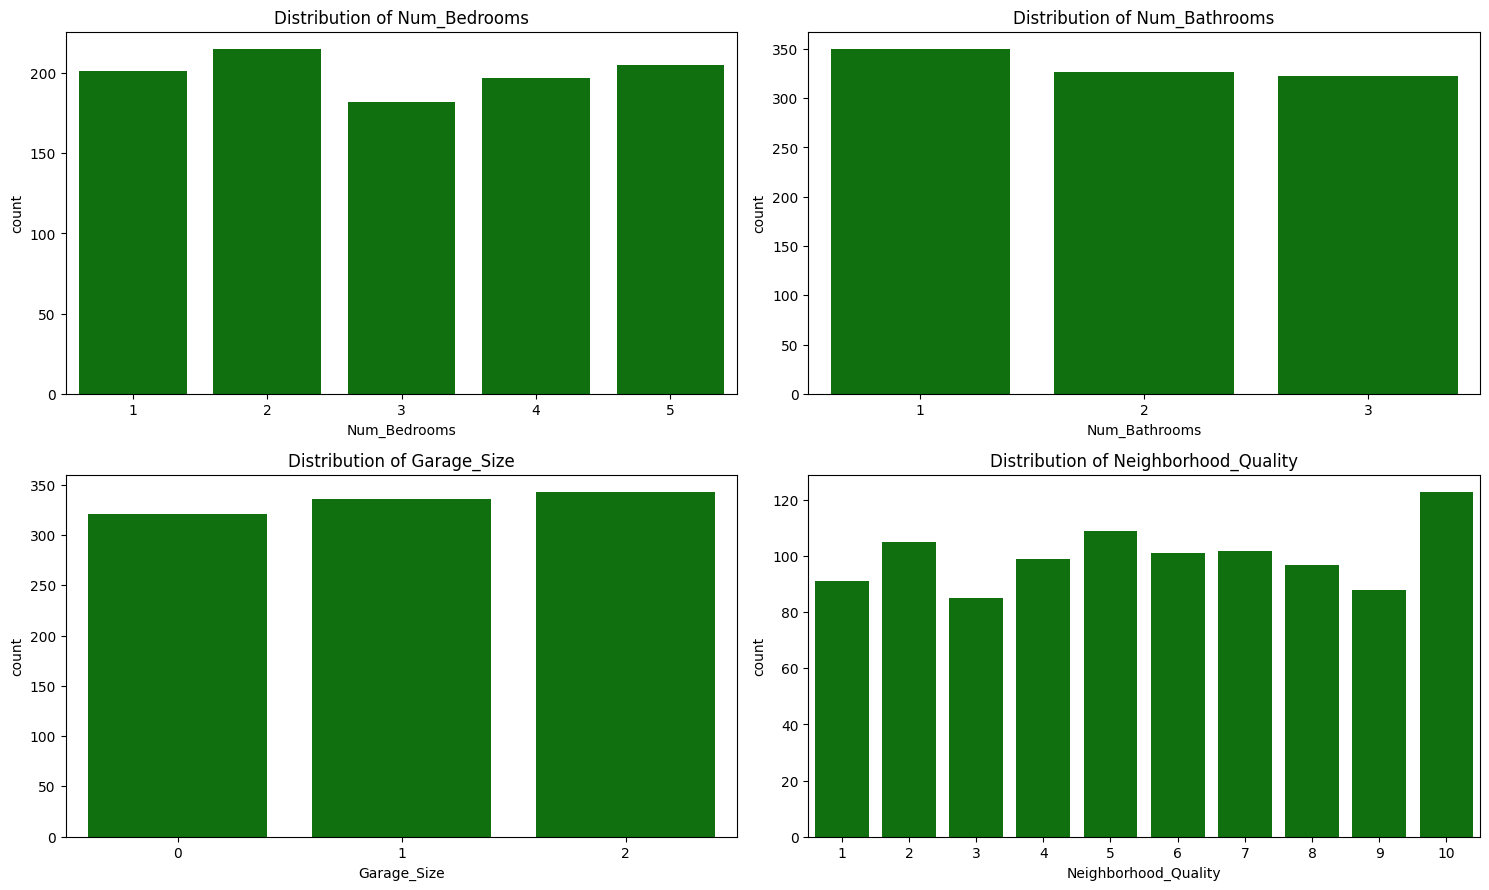

In [91]:
# Numerical columns to analyze
numerical2 = ['Num_Bedrooms', 'Num_Bathrooms','Garage_Size','Neighborhood_Quality']

plt.figure(figsize=(15, 13))
for i, col in enumerate(numerical2, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid for the plots
    sns.countplot(x=df[col], color='green')  # Create a count plot for each feature
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability if there are many categories

plt.tight_layout()
plt.show()

## 1.3 Bivariate Analysis

### 1.3.1 Number of Bedrooms, Number of Bathroom, Garage Size, and Neighborhood Quality vs House Price

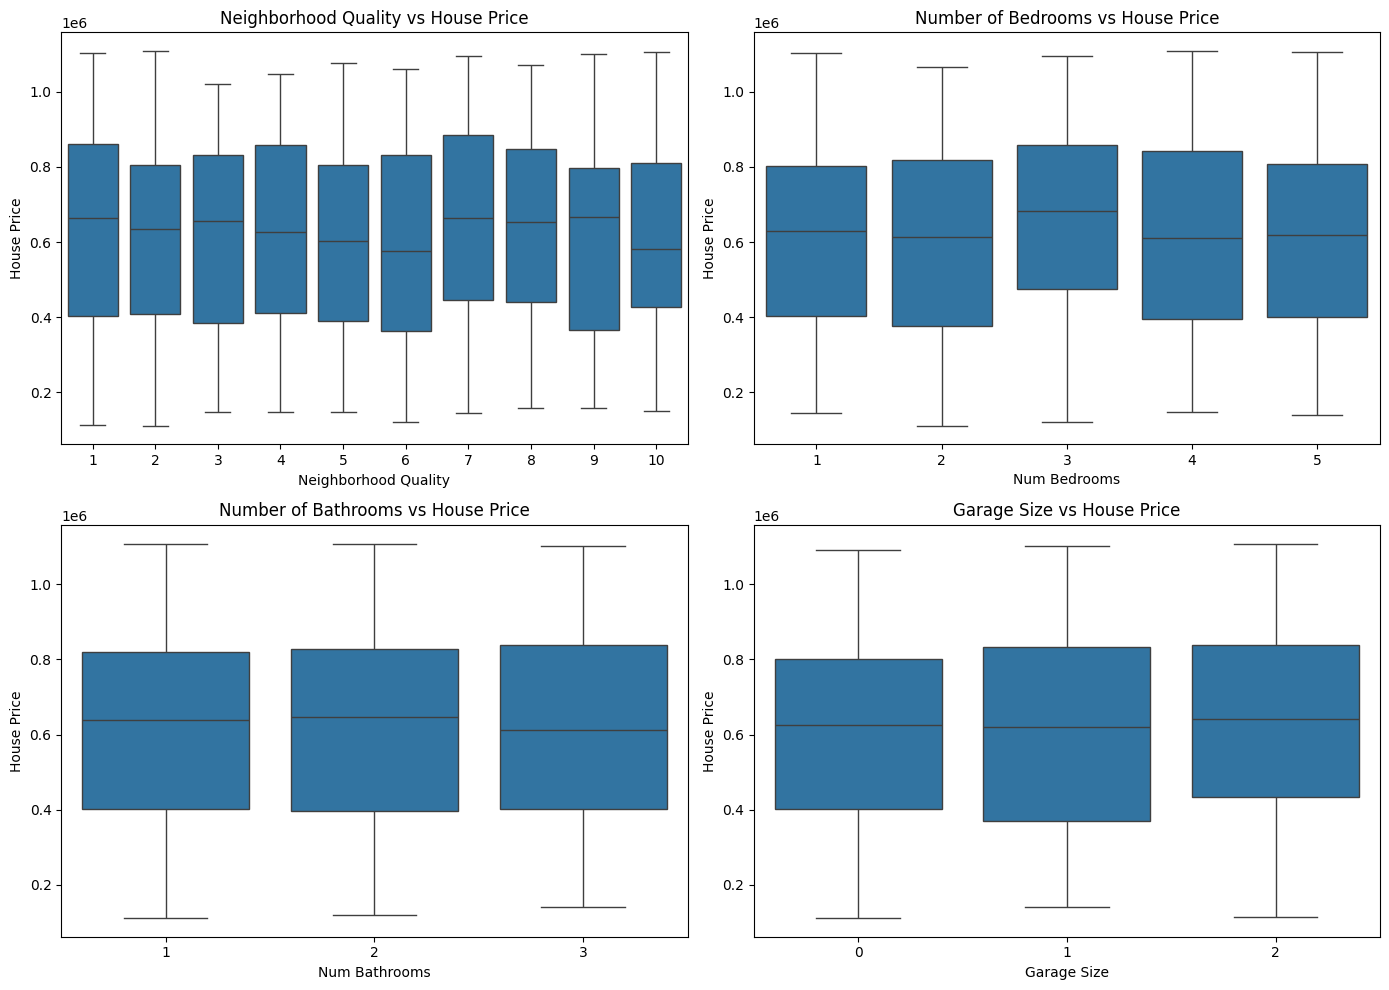

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur yang akan diplot
features = ['Neighborhood_Quality', 'Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size']
titles = [
    "Neighborhood Quality vs House Price",
    "Number of Bedrooms vs House Price",
    "Number of Bathrooms vs House Price",
    "Garage Size vs House Price"
]

# Membuat subplot dengan ukuran grid yang sesuai
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid untuk 4 plot
axes = axes.flatten()  # Flatten menjadi array 1D untuk iterasi

# Loop untuk membuat boxplot di setiap subplot
for ax, feature, title in zip(axes, features, titles):
    sns.boxplot(x=feature, y='House_Price', data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature.replace('_', ' '))  # Mengubah label x agar lebih rapi
    ax.set_ylabel("House Price")

# Menyesuaikan layout
plt.tight_layout()
plt.show()

### 1.3.2 House Price Trend by Year Built

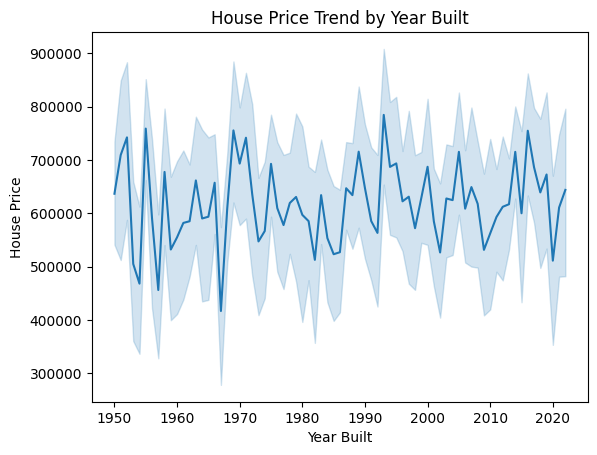

In [148]:
sns.lineplot(x='Year_Built', y='House_Price', data=df)
plt.title("House Price Trend by Year Built")
plt.xlabel("Year Built")
plt.ylabel("House Price")
plt.show()

## 1.4 Multivariate Analysis

### 1.4.1 Heatmap Correlation

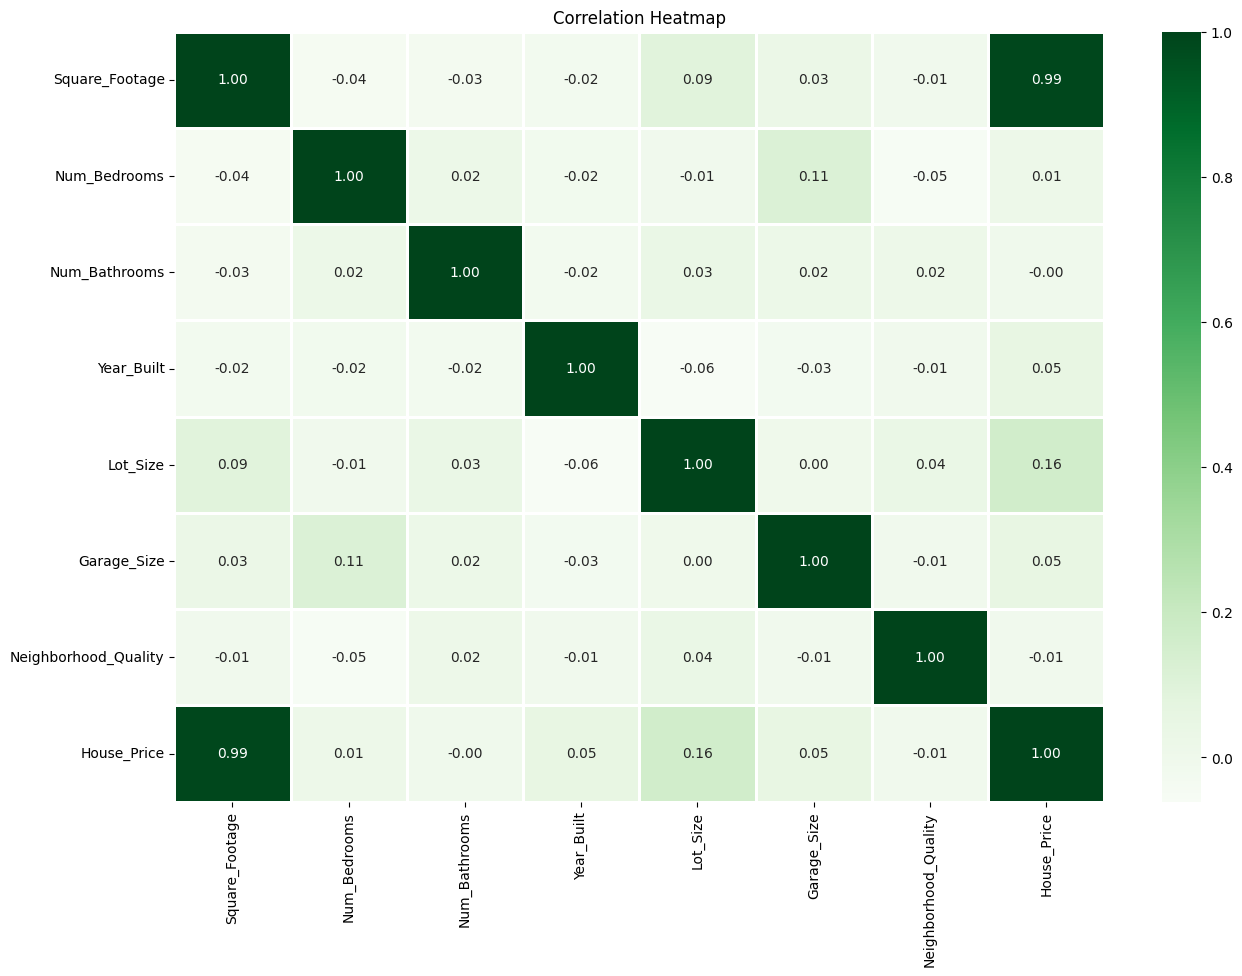

In [144]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

### 1.4.2 Pairplot

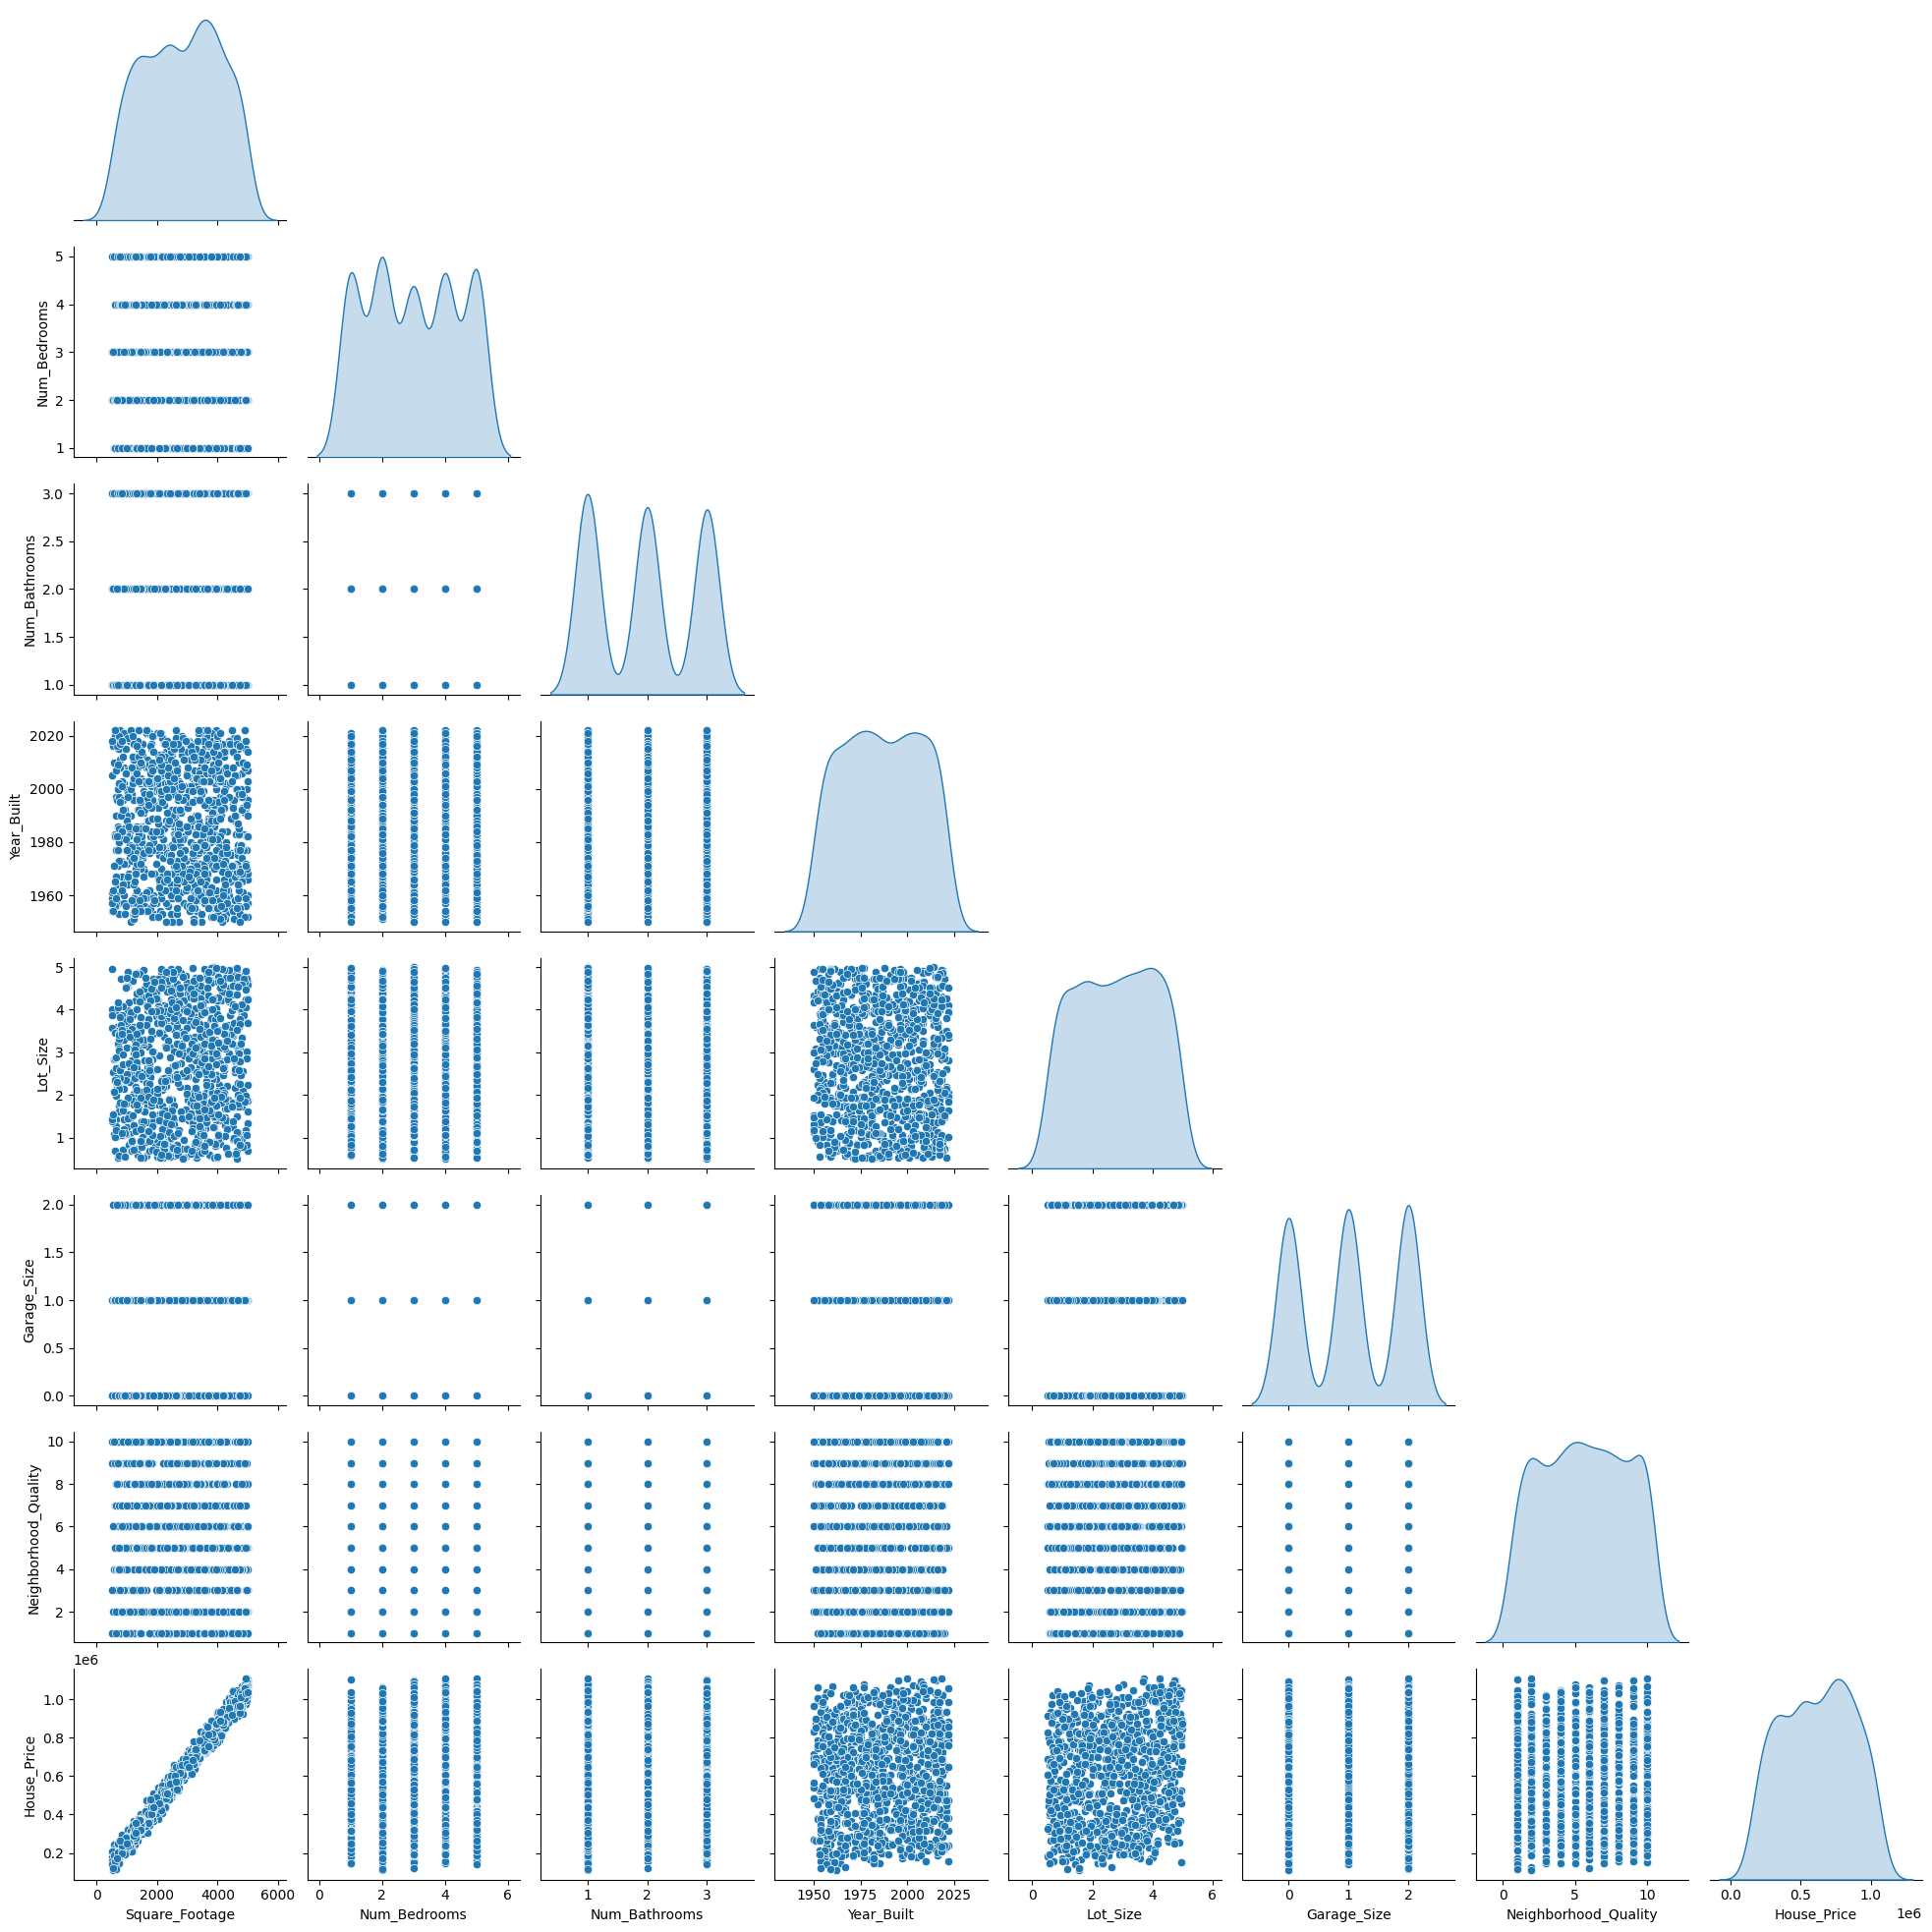

In [127]:
subset_features = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms','Year_Built', 
                   'Lot_Size', 'Garage_Size','Neighborhood_Quality', 'House_Price']

# Create Pairplot
sns.pairplot(df[subset_features], diag_kind='kde', corner=True)
plt.show()

# 2. Data Preprocessing

## 2.1 Missing Values

In [99]:
# check missing values
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Data has not missing values.

## 2.2 Duplicate Rows

In [97]:
# check duplicate rows
data_duplicated = df.duplicated().any()

if data_duplicated == False:
    print('Data has not duplicate rows')
else:
    print('Data has duplicate rows')

Data has not duplicate rows


## 2.3 Handle Infinite Values

In [128]:
# Check for infinite values
infinite_mask = df.isin([np.inf, -np.inf])

# Display columns with infinite values
columns_with_infinite = df.columns[infinite_mask.any(axis=0)]

print("Columns With Infinite Values:")
print(columns_with_infinite.tolist())

Columns With Infinite Values:
[]


## 2.4 Handle Outlier

In [130]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the lower and upper bounds to detect outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Mark rows that are outliers (True for outliers)
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

# Check the number of outliers per column
print(outliers.sum())

# Calculate the number of rows that have outliers in any column
outlier_rows = outliers.any(axis=1).sum()

# Calculate the percentage of outliers
outlier_percentage = (outlier_rows / len(df)) * 100
print('')
print(f"Outlier Percentage: {outlier_percentage:.2f}%")

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Outlier Percentage: 0.00%


# 3. Modeling

## 3.1 Define Independent and Dependent Features

In [29]:
# defines independent and dependent features/variable
X = df.drop(columns=['House_Price'],axis=1)
y = df['House_Price']  # house price is dependent variable or target

## 3.2 Train and Test Split

In [71]:
from sklearn.model_selection import train_test_split

# split data into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# number of rows and columns 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 7)
(200, 7)
(800,)
(200,)


## 3.3 Fit Regression Model

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# define Model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0)
}

# save evaluation result
results = []

for name, model in models.items():
    # train model
    model.fit(X_train, y_train)
    
    # prediction on train data
    y_train_pred = model.predict(X_train)
    
    # prediction on test data
    y_test_pred = model.predict(X_test)
    
    # Calculate metric on train data
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Calculate metric on test data
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Save evaluation result in new dataframe
    results.append({
        'Model': name,
        'Train MAPE': mape_train,
        'Test MAPE': mape_test,
        'Train R2': r2_train,
        'Test R2': r2_test,
        'R2 Gap': abs(r2_train - r2_test)
    })

## 3.4 Evaluation Metrics and Overfitting Checking

In [93]:
# Convert result to dataframe 
results_df = pd.DataFrame(results)

# display result
display(results_df)

,Model,Train MAPE,Test MAPE,Train R2,Test R2,R2 Gap
0,Linear Regression,0.015572,0.016639,0.998538,0.998426,0.000111
1,Ridge Regression,0.015574,0.016640,0.998538,0.998426,0.000111
2,Lasso Regression,0.015572,0.016639,0.998538,0.998426,0.000111
3,Decision Tree,0.000000,0.049017,1.000000,0.984920,0.015080
4,Random Forest,0.013301,0.032490,0.998948,0.993956,0.004992
5,Support Vector Regressor,0.525387,0.522769,-0.000806,-0.000341,0.000465


## 3.5 Coefficient For Each Feature

In [87]:
# Create and fit Linear Regression Model
logreg_model = LinearRegression()
logreg_model.fit(X_train, y_train)

# Display coefficient for each feature
coefficients = pd.DataFrame(logreg_model.coef_, X.columns, columns=['Coefficient'])
display(coefficients)

,Coefficient
Square_Footage,199.513245
Num_Bedrooms,10225.204424
Num_Bathrooms,8208.434778
Year_Built,993.537171
Lot_Size,14885.384415
Garage_Size,5146.148383
Neighborhood_Quality,115.068595
